# ハイパーパラメータの調整

## 1. 初期設定

In [1]:
# coding: utf-8
'''
ここの初期設定は変更しないでください
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #グラフの描画
import os, sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer2

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # Read Test Data

## 2. 最適なハイパーパラメータの探求

=== epoch:1, train acc:0.102183333333, test acc:0.101 ===
=== epoch:2, train acc:0.891016666667, test acc:0.8901 ===
=== epoch:3, train acc:0.9189, test acc:0.9154 ===
=== epoch:4, train acc:0.92925, test acc:0.9264 ===
=== epoch:5, train acc:0.936866666667, test acc:0.935 ===
=== epoch:6, train acc:0.941916666667, test acc:0.9373 ===
=== epoch:7, train acc:0.94685, test acc:0.9425 ===
=== epoch:8, train acc:0.95045, test acc:0.9466 ===
=== epoch:9, train acc:0.953133333333, test acc:0.9482 ===
=== epoch:10, train acc:0.95605, test acc:0.9518 ===
=============== Final Test Accuracy ===============
test acc:0.9511


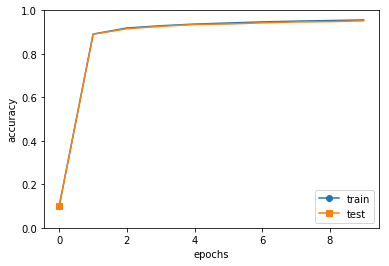

In [2]:
'''
↓↓↓この以下3行のハイパーパラメータのみを変更してください
'''
hidden_size_list=[100, 100, 100, 100] # 隠れレイヤーの数とノード数（リストの形で与える） ex) [100, 50, 50]
activation="sigmoid" # 隠れレイヤーの活性化関数 ex) "sigmoid" | "relu"
optimizer="AdaGrad" # 最適化手法の種類 ex) "SGD" | "Momentum" | "Nesterov" | "AdaGrad" | "RMSprop" | "Adam"
epochs=10 # 学習時間の長さ(どの程度繰り返し計算をさせるか)
'''
↑↑↑ここまで
'''

network = MultiLayerNetExtend(input_size=784, hidden_size_list=hidden_size_list, output_size=10, activation=activation)
trainer = Trainer2(network, x_train, t_train, x_test, t_test, epochs=epochs, mini_batch_size=100, optimizer=optimizer, optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 3. 学習後の重みパラメータの可視化

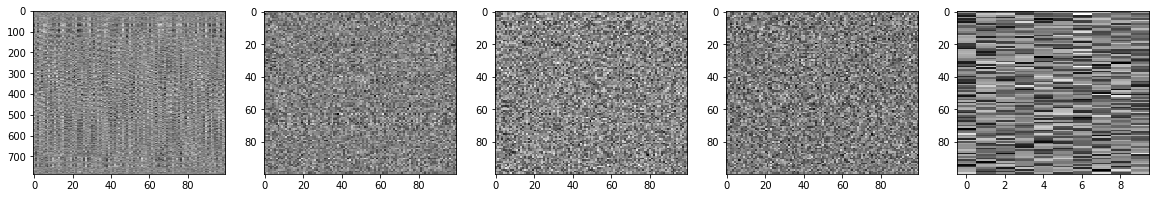

In [3]:
fig = plt.figure(figsize=(20, 3))
for idx in range( len(hidden_size_list) + 1):
    img = network.params['W' + str(idx+1)]
    fig.add_subplot(1, len(hidden_size_list) + 1, idx+1)
    plt.imshow(np.array(img),cmap='gray', aspect="auto")